In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-FHV-services_jan-aug-2015.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Prestige_B01338.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Firstclass_B01536.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Skyline_B00111.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Lyft_B02510.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Dial7_B00887.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Diplo_B01196.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Federal_02216.csv
/kaggle/input/uber-pickups-in-new-york-city/Uber-Jan-Feb-FOIL.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Highclass_B01717.csv
/kaggle/input/uber-pickups-in-ne

# Before we start:

Thank you for your time walking through this analysis with me! 

The aim of this analysis is to address three key questions by leveraging data from Uber rides in NYC in 2014. 

We will put forth proposals and substantiate them through thorough analysis of the data.

# Questions and Proposals:

1. What’s the output operating metric or financial metric that’s most important to move?
* Rides per day/week/month: ride volume would directly impact Uber's revenue. 
* Average revenue per ride: moniter the revenue statistics can help determine effective promotion and fee structure.
* Market share: higher market share and penetration would indicate a larger user base and potential for revenue growth.

2. What’s the input metric that is the most powerful one to move, to move that output metric? 
* User engagement: monitor user's level with promotions or discounts could provide insights to operation strategy.
* Rating system: collect feedback from users can help optimize user experience.
* User pattern: understand user's preference and needs from their pattens could provide insights to attract or retain users.

3. What are the best 2-3 ideas of initiatives to move that input metric? 
* Suburban Promotions
* Weekend Getaways
* Revitalize Uber Carpooling Service

We will demonstrate the output and input metrics through data visualization, with a particular focus on the third initiative, 'Revitalize Uber Carpooling Service,' in the conclusion part of our analysis.

## Introduction

This analysis utilizes data on over 4.5 million Uber pickups in New York City from April to September 2014. The data is organized into six files, separated by month, and includes the following columns:

- Date/Time: The date and time of the Uber pickup
- Lat: The latitude of the Uber pickup
- Lon: The longitude of the Uber pickup
- Base: The TLC base company code affiliated with the Uber pickup

As we do not have access to revenue or fee per trip information, our analysis will focus on analyzing user patterns in date and time to gain insights.

In [2]:
# Import packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import csv files:
data_apr= pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv')
data_may= pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv')
data_jun= pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv')
data_jul= pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv')
data_aug= pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv')
data_sep= pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv')
data_concat= pd.concat([data_apr,data_may,data_jun, data_jul,data_aug,data_sep])

# Examining data for April 2014
Let's start by examining the data for April 2014 in order to visualize the pattern of Uber rides in NYC.

Before creating plots, we need to create some new columns in the original dataset 'data_apr'.

In [4]:
# Convert Date/Time column to datetime type:
data_apr['Date/Time'] = pd.to_datetime(data_apr['Date/Time'])

# Add two new columns of Date and Hours:
data_apr['Date'] = data_apr['Date/Time'].dt.date
data_apr['Hour'] = data_apr['Date/Time'].dt.hour
data_apr['Day_of_Week']= data_apr['Date/Time'].dt.strftime('a%A')

# Calculate counts of occurance of Dates and Hours:
date_counts = data_apr['Date'].value_counts().sort_index()
hour_counts = data_apr['Hour'].value_counts().sort_index()
day_counts = data_apr['Day_of_Week'].value_counts()

# Plot ride volumn by Date

We will start by creating a bar plot to visualize the volume of rides throughout the dates of the month.

From the plot, it is evident that the daily ride volumes follow a cyclical pattern.

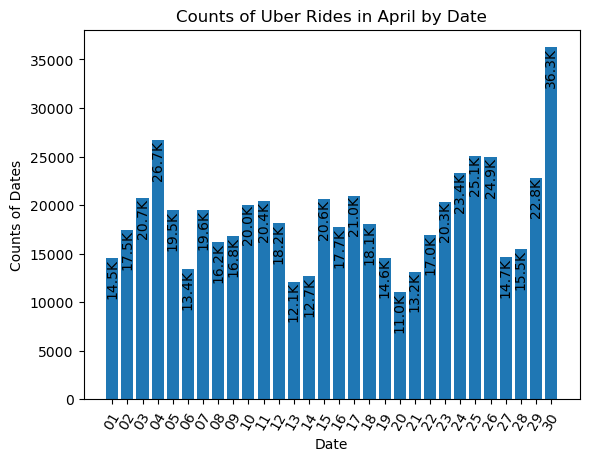

In [5]:
# Create a bar plot of Dates:
plt.bar(date_counts.index,date_counts.values)
plt.xlabel('Date')
plt.xticks(date_counts.index, [i.strftime('%d') for i in date_counts.index], rotation= 60)

plt.ylabel('Counts of Dates')

# Add annotation on y-axis:
for i in range(len(date_counts)):
    plt.text(date_counts.index[i], date_counts.values[i], f"{date_counts.values[i]/1000:.1f}K", rotation= 90, ha='center', va='top')

plt.title('Counts of Uber Rides in April by Date')
plt.show()

# Plot ride volumn by Days in Week

Based on the previous plot, it seems like there might also be a pattern throughout the weeks. 

To confirm this, we can create another plot based on the days of the week. 

Please note that we will need to reindex the x-ticks to display the days of the week from Monday to Sunday.

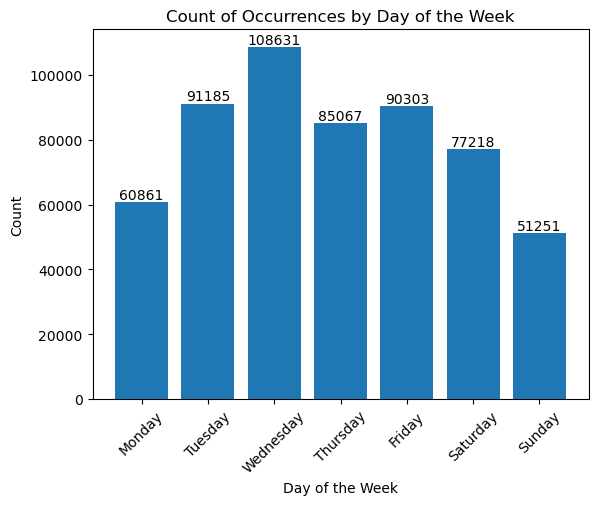

In [6]:
# Sort the counts of Days from Monday to Friday:
days_label= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_in_order= ['aMonday', 'aTuesday', 'aWednesday', 'aThursday', 'aFriday', 'aSaturday', 'aSunday']
day_counts= day_counts.reindex(days_in_order)

# Make a bar plot:
plt.bar(day_counts.index, day_counts.values)

# Reset the x-axis label:
plt.xlabel('Day of the Week')
plt.xticks(ticks= day_counts.index,labels= days_label,rotation= 45)

plt.ylabel('Count')

# Add annotation on y-axis:
for i in range(len(day_counts)):
    plt.text(day_counts.index[i], day_counts.values[i], str(day_counts.values[i]), ha='center', va='bottom')

plt.title('Count of Occurrences by Day of the Week')
plt.show()

# Plot ride volumn by Hours:

To dive depper into our data, we can also plot the ride occurance by hours of a day

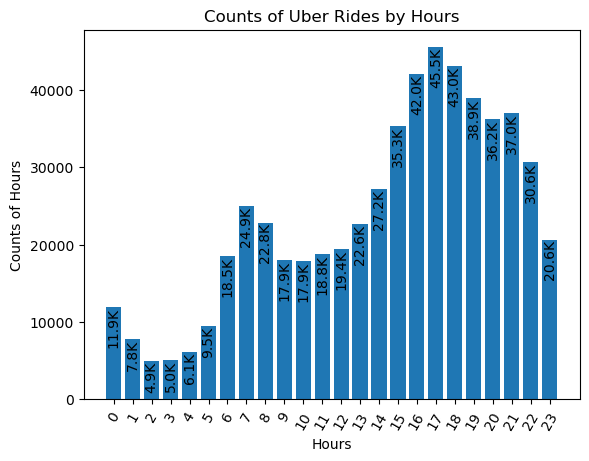

In [7]:
# Create a bar plot for Hours:
plt.bar(hour_counts.index,hour_counts.values)
plt.xlabel('Hours')
plt.xticks(hour_counts.index,rotation= 60)

plt.ylabel('Counts of Hours')

# Add annotation on y-axis:
for i in range(len(hour_counts)):
    plt.text(hour_counts.index[i], hour_counts.values[i], f"{hour_counts.values[i]/1000:.1f}K", rotation= 90, ha='center', va='top')

plt.title('Counts of Uber Rides by Hours')
plt.show()

# Observation 1 -- from April 2014 Data

Based on the plot of count of Uber rides by day of the week in April 2014 in NYC,

it appears that Monday and Sunday have the least counts, while Tuesday and Wednesday have the most rides. 

Additionally, the plot indicates that approximately 60% of rides occurred between 14:00 - 21:00.

**Some possible proposals for the reasons behind this pattern could be:**

**1. Commuting patterns**: Tuesdays and Wednesdays are typically busy weekdays when people commute to work and go about their regular activities. This could explain the higher ride counts on these days. In contrast, Mondays and Sundays may see fewer rides as people may be off work or have more flexible schedules.

**2. Business travel:** Tuesdays and Wednesdays are often popular days for business travel, as professionals may travel to different locations for meetings, conferences, or other work-related events. This could contribute to the higher ride counts on these days compared to Mondays and Sundays.

**3. Weekend leisure activities:** Mondays and Sundays may see fewer rides as people may prefer to stay at home or engage in leisure activities closer to their residences during weekends, resulting in lower ride counts.

# Examing All Data from April to September

Now, let's expand our time span to analyze all the data from April to September 2014 and determine if the same patterns are observed as before.

Due to the time span, we will create **line plots** to show pattern!

In [8]:
data_concat['Date/Time'] = pd.to_datetime(data_concat['Date/Time'])

# Add two new columns of Date and Hours:
data_concat['Date'] = data_concat['Date/Time'].dt.date
data_concat['Hour'] = data_concat['Date/Time'].dt.hour
data_concat['Day_of_Week']= data_concat['Date/Time'].dt.strftime('a%A')

# Calculate counts of occurance of Dates and Hours:
date_counts_concat = data_concat['Date'].value_counts().sort_index()
hour_counts_concat = data_concat['Hour'].value_counts().sort_index()

day_counts_concat = data_concat['Day_of_Week'].value_counts()

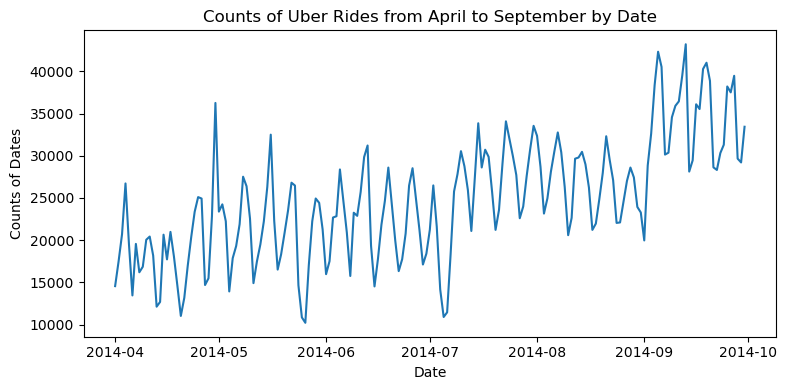

In [9]:
# Create a line plot of Dates:
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.plot(date_counts_concat.index, date_counts_concat.values)
ax.set_xlabel('Date')
ax.set_ylabel('Counts of Dates')
ax.set_title('Counts of Uber Rides from April to September by Date')

plt.tight_layout()
plt.show()

# Peaks and Pits

By creating a line plot, it appears that Uber ride volumes follow **cyclical patterns**, with **peaks and pits**. 

Let's add **annotations** to highlight dates of these peaks and pits.

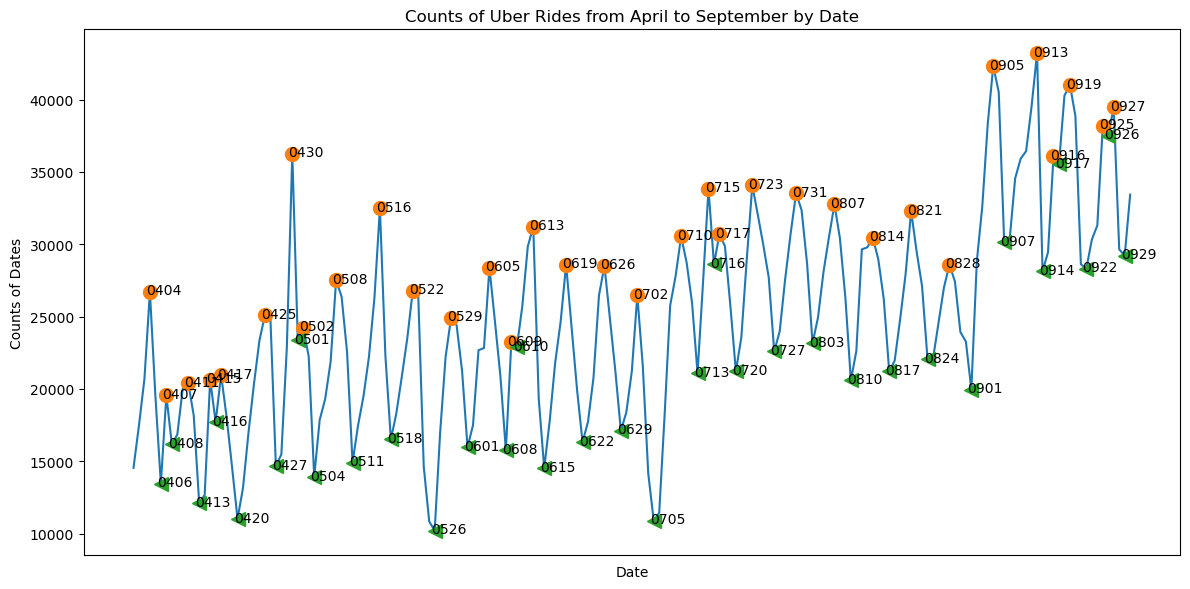

In [10]:
# Create a line plot of Dates:
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(date_counts_concat.index, date_counts_concat.values)
ax.set_xlabel('Date')
ax.set_ylabel('Counts of Dates')
ax.set_title('Counts of Uber Rides from April to September by Date')

# Get the indices of peaks and pits in the data:
from scipy.signal import find_peaks
peaks, _ = find_peaks(date_counts_concat.values)
pits, _ = find_peaks(-date_counts_concat.values)
peaks_and_pits = np.sort(np.concatenate([peaks, pits]))

# Add markers at the peaks and pits:
ax.plot(date_counts_concat.index[peaks], date_counts_concat.values[peaks], 'o', markersize=10, label='Peaks')
ax.plot(date_counts_concat.index[pits], date_counts_concat.values[pits], '<', markersize=10, label='Pits')

# Add annotations with the corresponding dates at the peaks and pits:
for i in range(len(peaks_and_pits)):
    ax.annotate(date_counts_concat.index[peaks_and_pits[i]].strftime('%m%d'),
                xy=(date_counts_concat.index[peaks_and_pits[i]], date_counts_concat.values[peaks_and_pits[i]]),
                xytext=(10,6),
                textcoords='offset points',
                fontsize= 10,
                ha='center',
                va='top')
                #bbox= dict(boxstyle='round',facecolor='white'))
    
ax.set_xticks([])
plt.tight_layout() 

plt.show()

**Given the line plot above, which shows peaks and dips, we can summarize the days of the week associated with these patterns.**

Following bar charts show peak and pits days distributions:

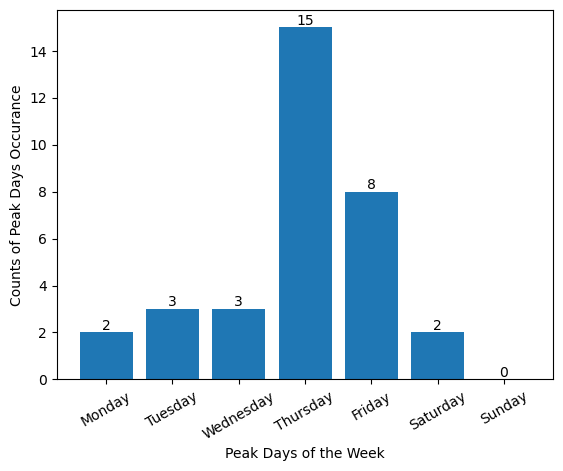

In [11]:
peak_days_of_week= []

for i in peaks:
    peak_date= date_counts_concat.index[i]
    peak_day_of_week= peak_date.strftime('%A')
    peak_days_of_week.append(peak_day_of_week)

peak_days, counts= np.unique(peak_days_of_week, return_counts= True)

peak_df= pd.DataFrame(data=counts, index=peak_days, columns=['Counts'])
days_label= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

peak_df= peak_df.reindex(days_label)
peak_df.fillna(0, inplace=True)
peak_df['Counts']= peak_df['Counts'].astype(int)

plt.bar(peak_df.index, peak_df['Counts'])
plt.xlabel('Peak Days of the Week')
plt.xticks(rotation= 30, ha= 'center')
plt.ylabel('Counts of Peak Days Occurance')

for i in range(len(peak_df.index)):
    plt.text(peak_df.index[i],peak_df.Counts[i],peak_df.Counts[i], ha= 'center', va= 'bottom')

plt.show()

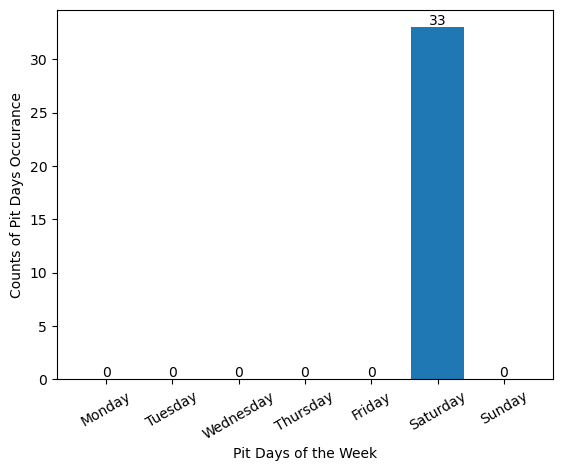

In [12]:
pits_days_of_week= []

for i in pits:
    pits_date= date_counts_concat.index[i]
    pits_day_of_week= peak_date.strftime('%A')
    pits_days_of_week.append(pits_day_of_week)

pits_days, counts= np.unique(pits_days_of_week, return_counts= True)

pits_df= pd.DataFrame(data=counts, index=pits_days, columns=['Counts'])
days_label= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pits_df= pits_df.reindex(days_label)
pits_df.fillna(0, inplace=True)
pits_df['Counts']= pits_df['Counts'].astype(int)

plt.bar(pits_df.index, pits_df['Counts'])
plt.xlabel('Pit Days of the Week')
plt.xticks(rotation= 30, ha= 'center')
plt.ylabel('Counts of Pit Days Occurance')

for i in range(len(pits_df.index)):
    plt.text(pits_df.index[i],pits_df.Counts[i],pits_df.Counts[i], ha= 'center', va= 'bottom')

plt.show()

# Observation 2 -- from Peak and Pit Pattern:

Based on the visualizations of Uber ride data in New York City from April to September 2014, it was found that:

* **Thursdays and Fridays were the most frequent peak ride days**, with the highest number of rides occurring on these days. This suggests that there may be increased demand for Uber rides on Thursdays and Fridays, possibly due to higher travel activity, events, or other factors during these weekdays. 

* **All 33 pit days, or days with the lowest ride counts, were observed on Sundays,** indicating relatively lower demand for Uber rides on Sundays during this period.


These observations from the half-year data align with our findings from April 2014, indicating that the observed patterns are not seasonal but rather continuous. 

This also supports our proposal that higher commute needs during weekdays result in increased ride volume, while reduced activities on weekends lead to decreased ride demands.

# Heatmap Analysis of Uber Ride Patterns in NYC: Validating Proposals:

To further validate our proposal regarding weekday commute needs and reduced ride demands on weekends -- 

We will create heatmaps using the 'Lat' and 'Lon' columns from the original data to visualize ride patterns on Thursday (peak day) and Sunday (off-peak day). 

We will name these heatmaps Thursday_heatmap and Sunday_heatmap, respectively, and by comparing them, we can gain valuable insights.

**Thursday Rides Heatmap:**

In [13]:
# Parse data:
thursday_data= data_apr[data_apr['Day_of_Week']=='aThursday']

import folium
from folium.plugins import HeatMap
heatmap_thursday= folium.Map(location= [40.7128,-74.0060], zoom_start= 12)

# Add heapmap layer to the NYC map:
HeatMap(thursday_data[['Lat','Lon']].values).add_to(heatmap_thursday)

heatmap_thursday

**Sunday Rides Heatmap:**

In [14]:
# Parse data:
sunday_data= data_apr[data_apr['Day_of_Week']=='aSunday']

import folium
from folium.plugins import HeatMap
heatmap_sunday= folium.Map(location= [40.7128,-74.0060], zoom_start= 12)

# Add heapmap layer to the NYC map:
HeatMap(sunday_data[['Lat','Lon']].values).add_to(heatmap_sunday)

heatmap_sunday

# Observation 3 -- from Heatmap:

Our observation of Uber ride patterns in NYC reveals that Thursdays consistently show the highest ride volume throughout the year --

The Thursday heatmap indicating a wider range of rides extending to suburban areas such as Bridgeport, Clverton, and Bridgewater Township. 

In contrast, on Sundays, the rides are concentrated in areas like New Brunswick and downtown. 

These two heatmaps provide compelling evidence to support our proposal that weekday commute needs are the **primary drivers** of ride demand, while reduced activity on weekends represents a **key pain point**.

# Initiatives for Revenue Boosting:

Based on this observation, UBER could consider the following initiatives to potentially boost revenue:

**1. Suburban Promotions:** UBER could run targeted promotions or marketing campaigns to attract more riders from suburban areas on Thursdays, such as offering discounted fares or incentives for rides originating from those areas. This could help increase the number of rides during the weekdays and generate additional revenue.

**2. Revitalize Uber Carpooling Service:** Uber launched its carpooling service two years ago, but it has struggled to gain traction among users, earning it the moniker of a 'zombie' service. Many people find it less appealing than traditional Uber rides due to the perception of spending more time on the road. However, with some strategic improvements, Uber could turn its carpooling service into a successful revenue driver.

Overall, analyzing the observed patterns in the UBER heatmap and tailoring promotions, marketing, and supply optimization strategies based on the demand patterns could potentially help UBER boost their revenue in NYC and better serve their riders' needs.

# Initiatives 1 -- Suburban Promotions: 

It's important to establish clear and **measurable success criteria** for promotion plan to track its effectiveness and make data-driven decisions for future marketing efforts. 

For example, success criteria could include:

**1. Increased Ride Volume:** 

One of the main objectives of the promotion plan could be to increase the number of rides taken by riders from suburban areas on Thursdays. 

The success criteria for this could be 20% percentage increase in the total number of rides compared to the previous Thursdays or a target number of additional rides from suburban areas on Thursdays.

**2. Expanded Geographical Reach:** 

Another success criteria could be to expand the geographical reach of Uber rides in suburban areas on Thursdays. 

This could be measured by the number of new suburban areas where Uber rides are taken on Thursdays, or the increase in the total number of rides in previously under-served suburban areas.


Uber is known to regularly launch promotions, discounts, and marketing campaigns to attract and retain riders, and these promotions can vary in terms of their scope, duration, and success. The effectiveness of promotions can depend on various factors, here are some **possible reasons that our SubUrban Promotion may not work**:

**1. Lack of Awareness:** 

If the promotion plan is not effectively communicated to potential riders in suburban areas, they may not be aware of the incentives or marketing campaigns being offered. 

This could result in a lack of response or participation in the promotion.

**2. Operational Limitations:** 

Operational limitations such as limited availability of Uber drivers in suburban areas on Thursdays, longer wait times, or insufficient coverage in certain areas may hinder the success of the promotion. 

If customers find it difficult to take Uber rides due to operational constraints, it may negatively impact the effectiveness of the promotion.

# Initiatives 2 -- Revitalize Carpooling Service: 

By implementing appointment-based system, optimizing nearby customer matching, and investing in promotions and advertising, Uber can revitalize carpooling service and turn it into a successful revenue driver. 

With **strategic improvements**, Uber can attract more users to its carpooling service and position it as a convenient, efficient, and cost-effective option for daily commuting and leisure trips.


**1. Appointment-based system:** 

Uber could implement an appointment-based system for carpooling, where users can schedule their rides in advance. 

This would allow users to plan their commute from suburban areas to their workplace during weekdays and from leisure concentrated areas to suburban areas during weekends. 

Users could make carpool appointments up to 12 hours before departure, similar to the successful example of **DIDI's carpooling service** in China, where 60% of users make appointments for their commute. 

This would provide convenience and predictability to users, saving them time on waiting and matching for rides.

**2. Nearby customer matching with route tracking:**

Uber can leverage its data and algorithms to efficiently match nearby customers with drivers for carpooling. 

By optimizing the matching process, Uber can reduce detours and waiting time, making the carpooling service more efficient and attractive to users. 

Additionally, Uber can work together with map technology companies, such as Google Maps, to track people's commute routes. 

If Uber identifies users who repeat the same route on weekdays, and finds other users who have similar repetitive routes, it can recommend selected users to join the Uber carpooling service. 

This would not only help to find potential users but also increase the number of users per ride, resulting in higher revenue for Uber.



Same as the first initiative, we could set **success criteria** for the carpooling service initiative. 

Given that it's a relative new service, we want to set the criteria in three phases:

**Phase 1: Advertising and Promotion**

Success Criteria: Increase in new users of carpooling service by a certain percentage within a specified timeframe.

Example: Achieve a 20% increase in new users of carpooling service within the first 3 months of the initiative.

**Phase 2: Customer Retention and Rating**

Success Criteria: Improvement in customer retention rate and positive customer ratings for carpooling service.

Example: Increase customer retention rate by 10% and maintain an average customer rating of 4 stars or higher on a scale of 5 stars, within the first 6 months of the initiative.

**Phase 3: Market Share**

Success Criteria: Attain a certain percentage of market share in commute rides for carpooling service.

Example: Capture 40% market share of all commute rides in the target market within 12 months of the initiative.

These success criteria can be measured using relevant metrics such as new user sign-ups, retention rate, customer ratings, and market share data. 

Regular monitoring and evaluation of these criteria can help assess the progress and effectiveness of your carpooling service initiative and make data-driven decisions for further improvements.

# What's more?

Thank you for taking the time to read through our analysis! We have delved into a vast dataset, examined the data, created visualizations, and uncovered interesting patterns.

Based on my previous work experience, my next step would be to engineer additional features such as customer demographics, fees per ride, and feedback, and incorporate them into machine learning models to predict Uber's future revenue.

However, due to the limitations of variables in the current dataset, such as the absence of transaction data and user demographics, it may not be meaningful to develop predictive models at this stage.

The good news is that I have identified a UBER user dataset available on AWS, albeit with a subscription cost of $1,500 USD.

As we conclude this analysis, I hope you found it informative and enjoyable. 

If you have any suggestions or feedback, please do not hesitate to contact me via melodyheee@outlook.com. Thank you once again for your time!